In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from scipy.misc import imread
import caffe
import sys
import imageio

sys.path.insert(0,"/home/s4746627/clockwork-fcn")
sys.path.insert(0,"/home/s4746627/clockwork-fcn/nets")

from lib import run_net
from lib import score_util
from lib import plot_util


plt.rcParams['figure.figsize'] = (12, 12)

caffe.set_device(1)
caffe.set_mode_gpu()

In [13]:
#net = caffe.Net('../nets/stage-nyud-fcn8s.prototxt', '../nets/nyud-fcn8s-rgb-heavy.caffemodel', caffe.TEST)
#net = caffe.Net('../nets/deploy.prototxt', 'snapshotADE_iter_16000.caffemodel', caffe.TEST)
#net = caffe.Net('../nets/deploy.prototxt', '../nets/fcn8s-heavy-pascal.caffemodel', caffe.TEST)
net = caffe.Net('../nets/deploy.prototxt', '../nets/FCN_iter_160000.caffemodel', caffe.TEST)

#net = caffe.Net('../nets/ade-fcn8s.prototxt', '../nets/fcn8s-heavy-pascal-copy.caffemodel', caffe.TEST)

In [7]:
def preprocess(filename):
    file = os.path.join(path, filename)
    im = Image.open(file)
    in_ = np.array(im, dtype=np.float32)
    in_ = in_[:,:,::-1]
    in_ = in_.transpose((2,0,1))
    return in_

In [11]:
path = os.path.abspath('/home/s4746627/inference_im/data/table/original/')

out = []
id = 0
for file in sorted(os.listdir(path)):
    in_ = preprocess(file)
    if id%2 == 0:
        output = run_net.segrun(net, in_)
    else:
        output = run_net.clockwork_forward(net, in_)
    out.append(output)
    
imageio.mimwrite('/home/s4746627/inference_im/data/table/segmentation.mp4', out , fps = 10)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 375) to (608, 384) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


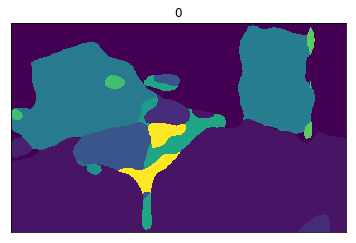

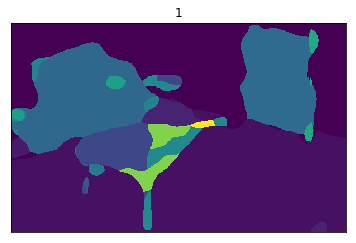

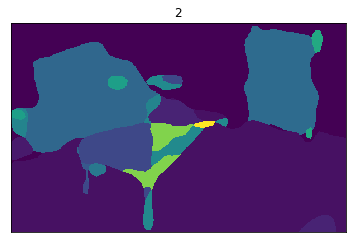

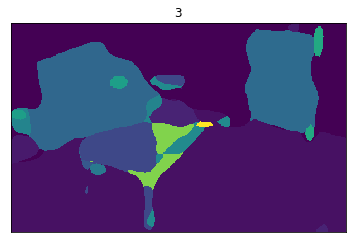

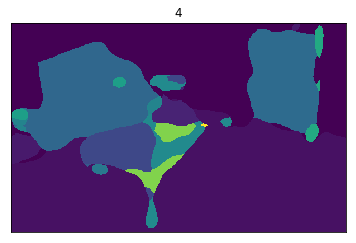

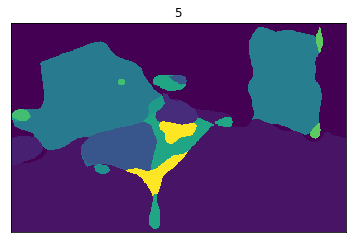

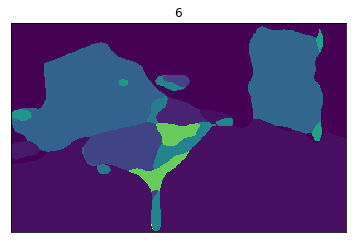

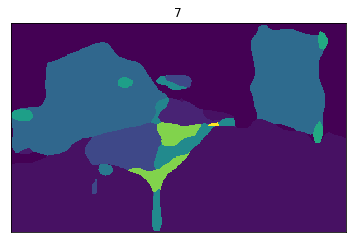

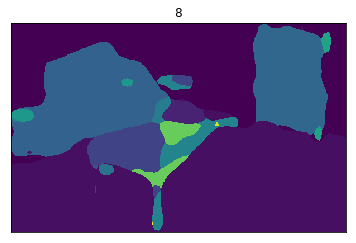

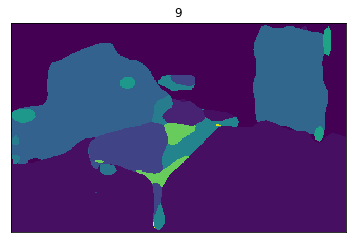

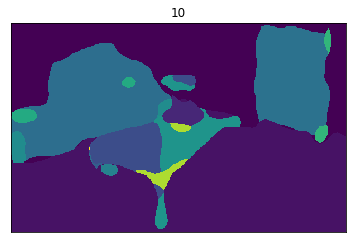

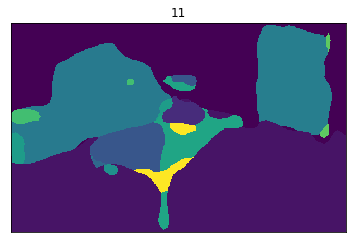

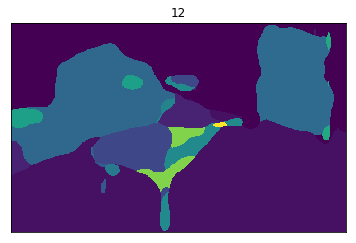

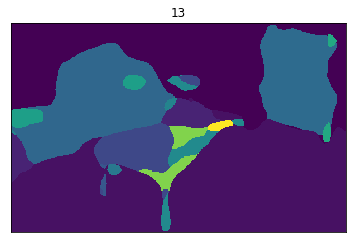

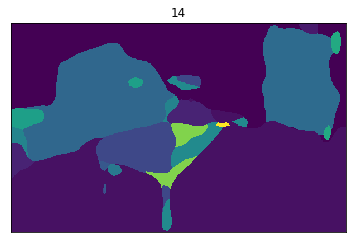

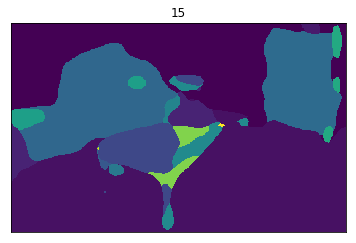

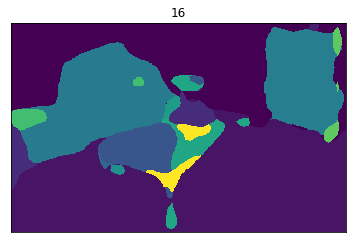

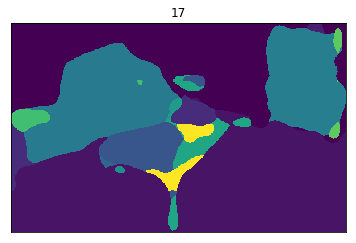

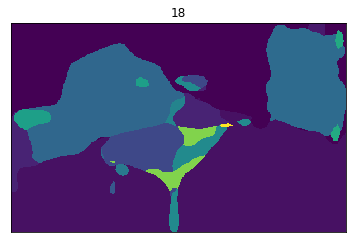

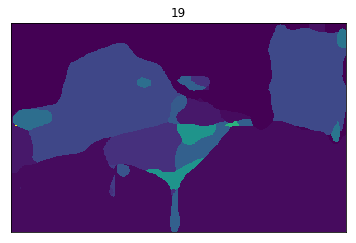

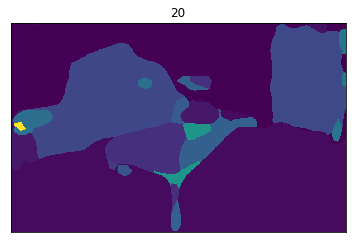

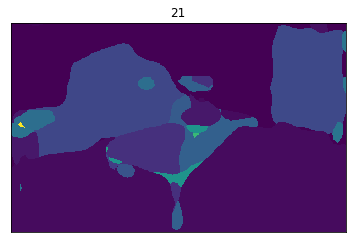

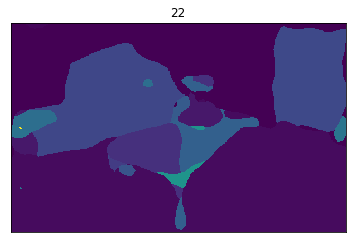

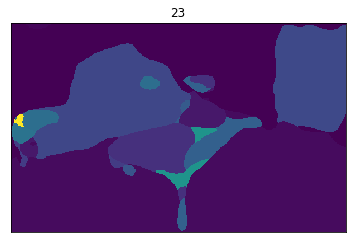

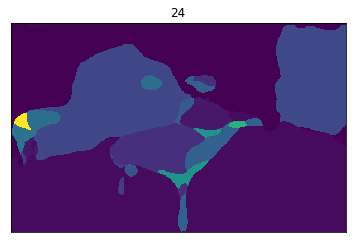

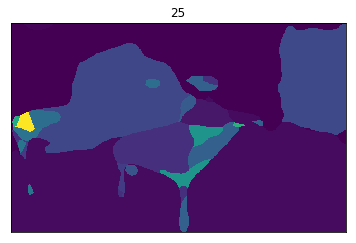

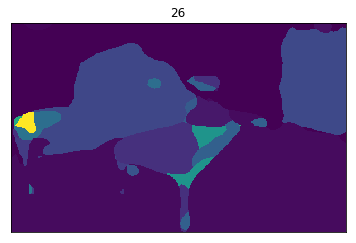

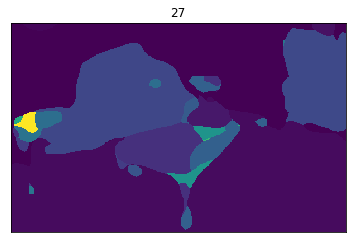

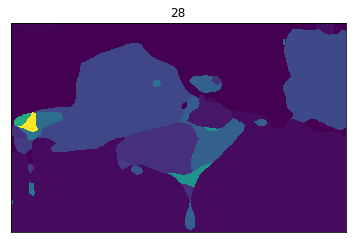

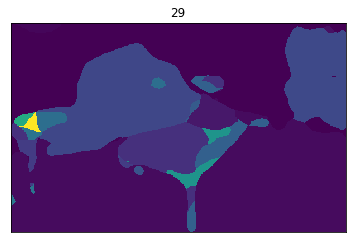

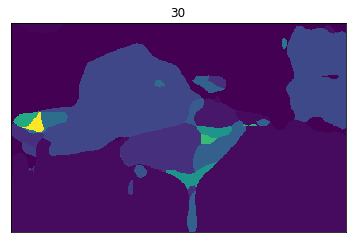

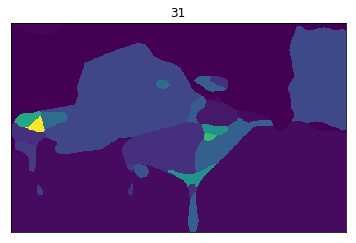

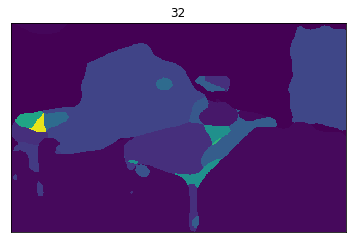

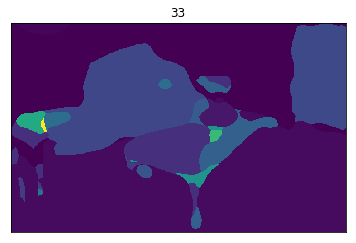

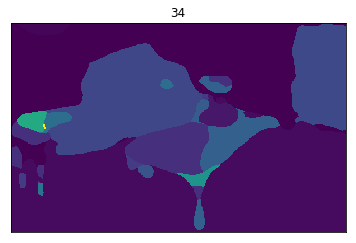

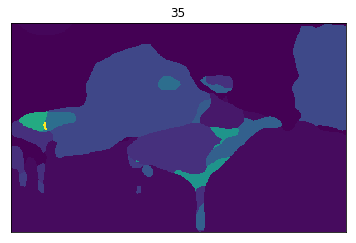

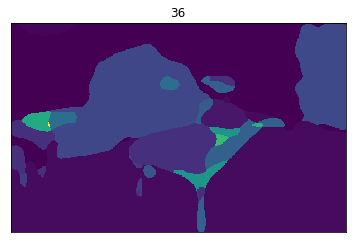

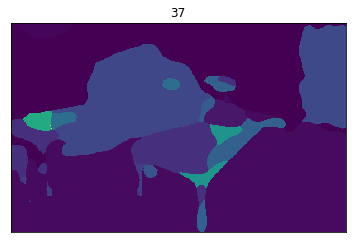

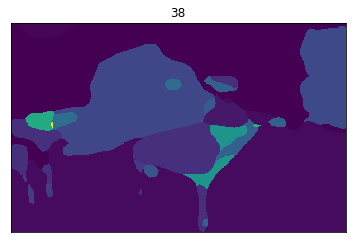

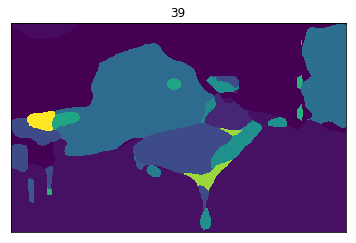

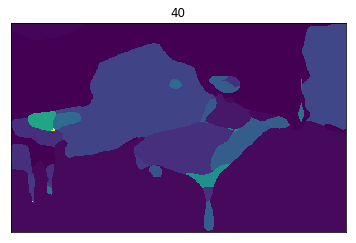

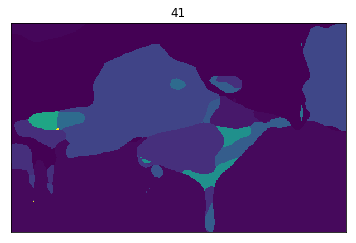

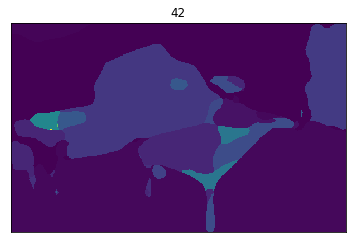

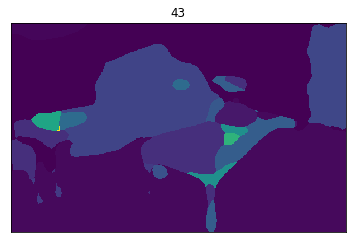

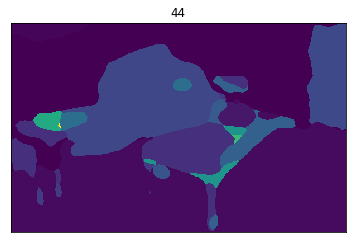

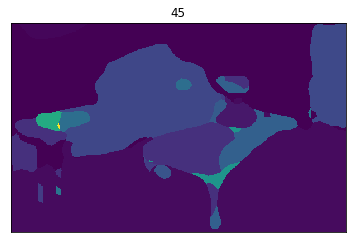

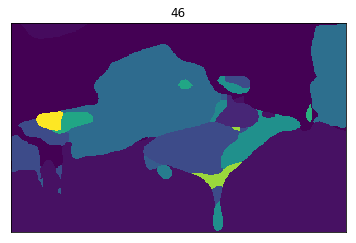

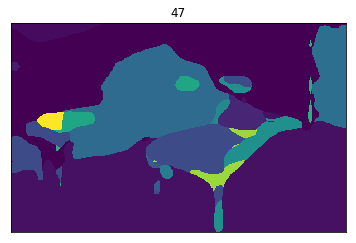

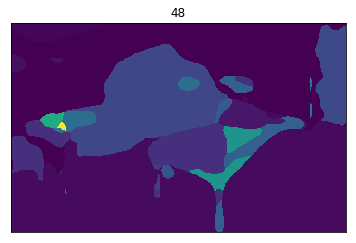

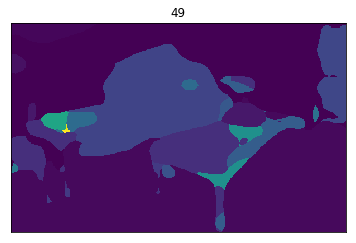

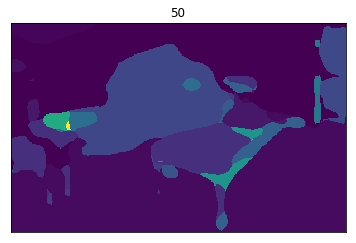

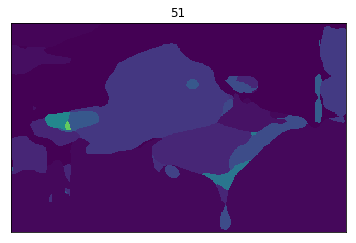

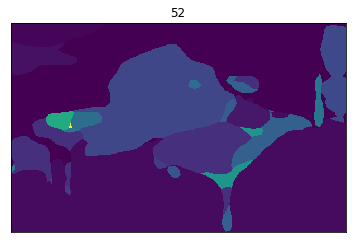

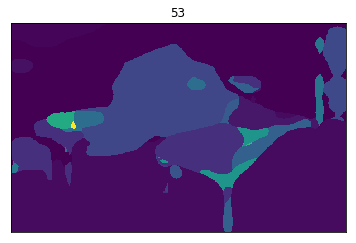

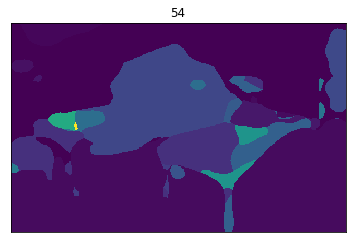

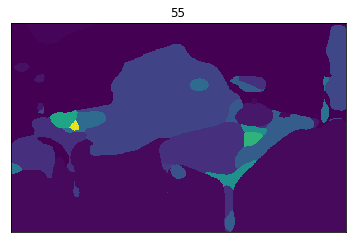

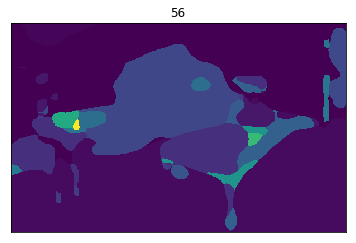

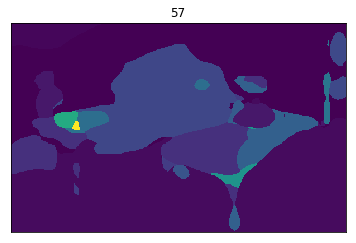

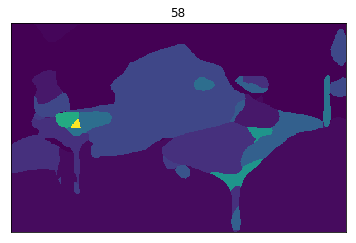

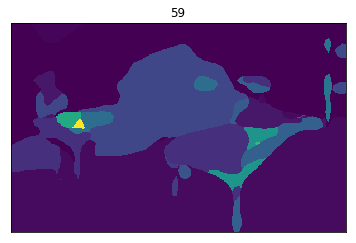

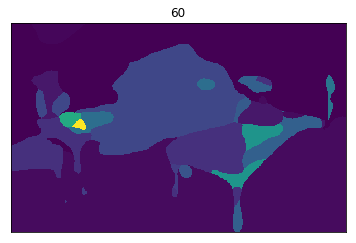

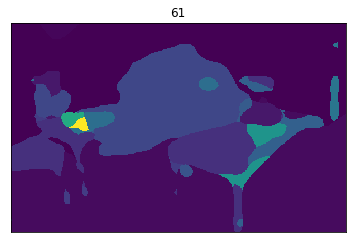

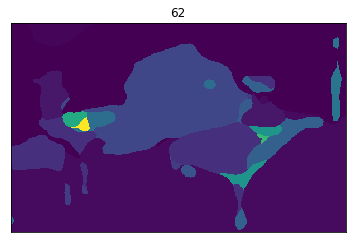

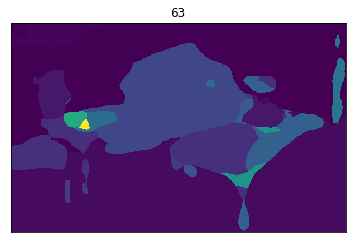

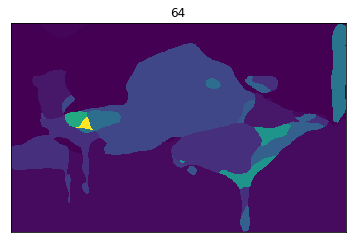

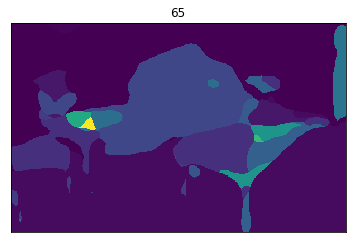

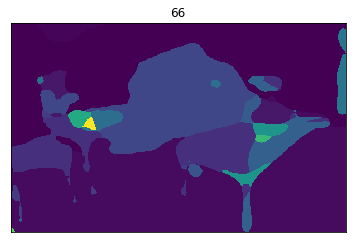

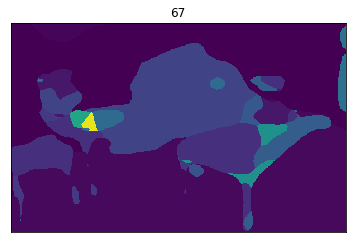

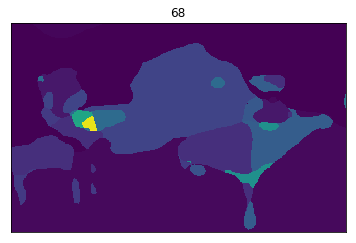

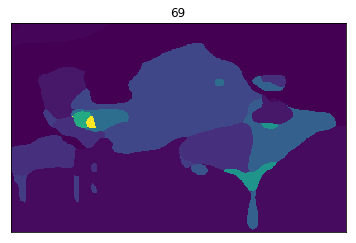

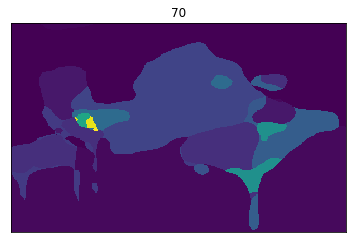

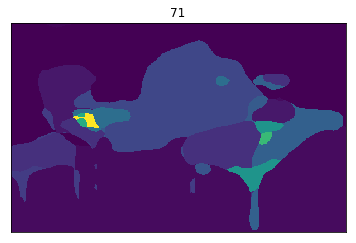

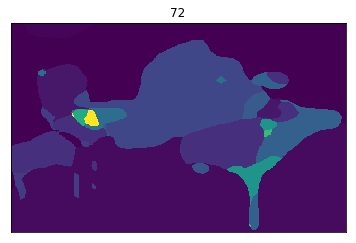

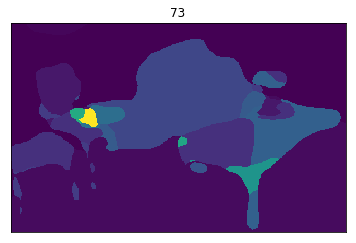

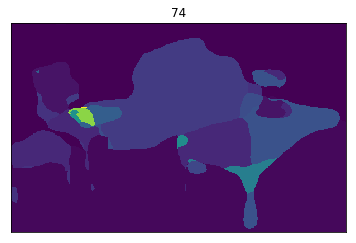

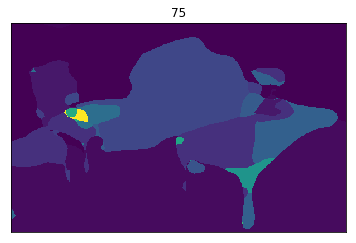

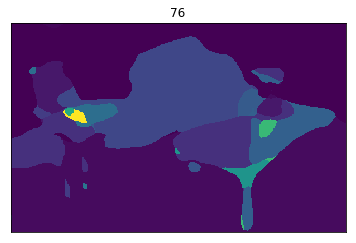

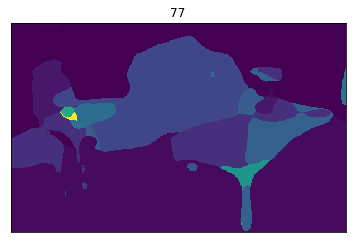

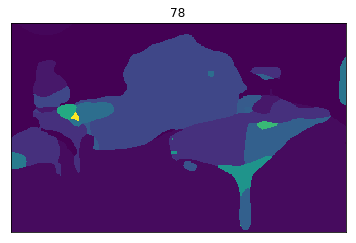

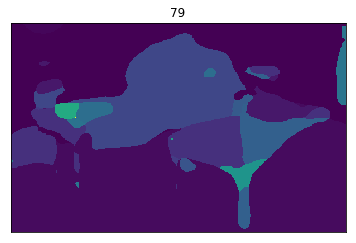

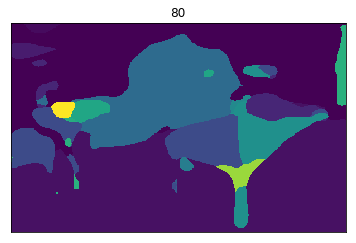

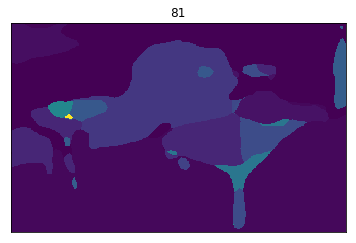

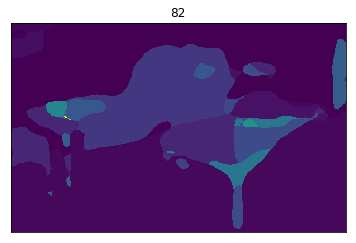

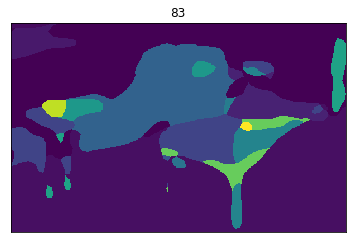

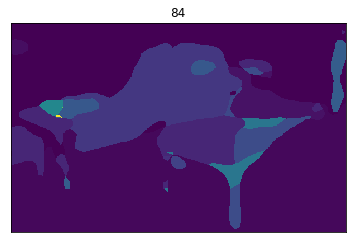

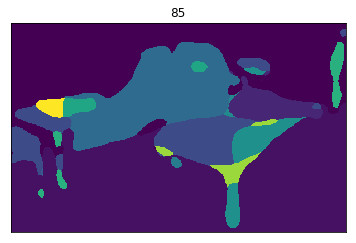

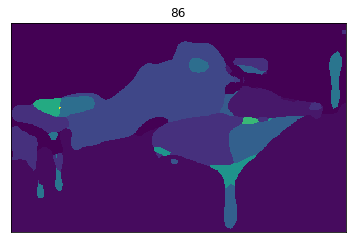

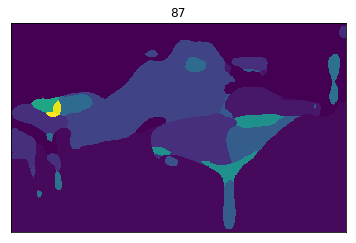

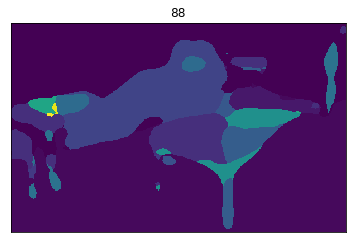

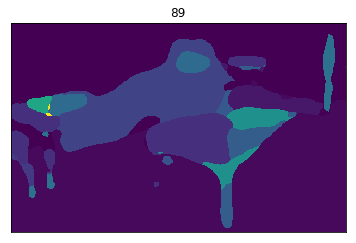

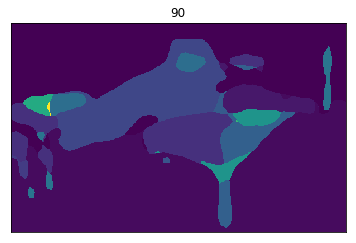

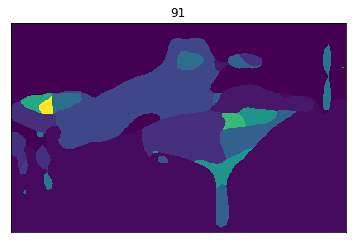

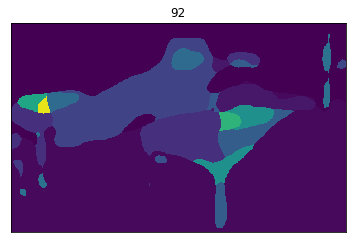

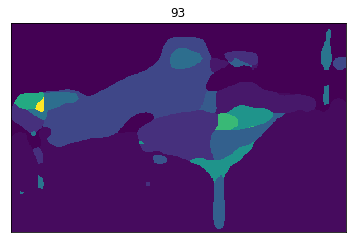

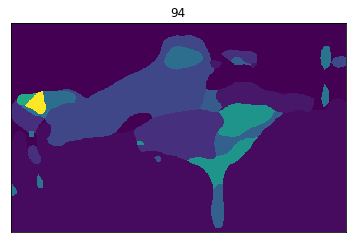

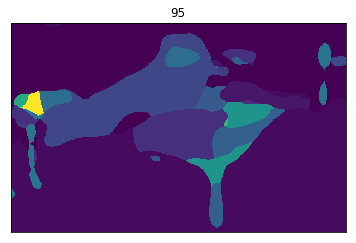

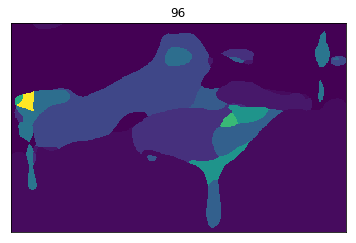

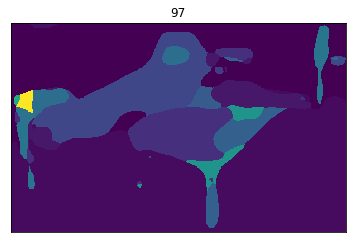

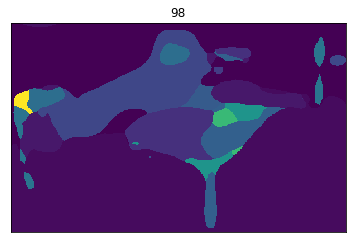

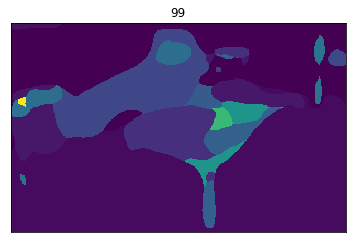

In [12]:
for i in range(len(out)):
    plt.figure()
    plt.imshow(out[i])
    plt.title('{}'.format(i)), plt.xticks([]), plt.yticks([])



In [5]:
def infer_video(path):
    out = []
    #print(os.listdir(path))
    for dirpath, dirnames, filenames in os.walk(path):
        for file in sorted(filenames):
            #file = os.path.join(os.path.relpath(dirpath, path), file)
            filename = os.path.join(dirpath, file)
            im = Image.open(filename)
            in_ = np.array(im, dtype=np.float32)
            in_ = in_[:,:,::-1]
            in_ = in_.transpose((2,0,1))

            net.blobs['data'].reshape(1, *in_.shape)
            net.blobs['data'].data[...] = in_

            net.forward()
            out.append(net.blobs['score'].data[0].argmax(axis=0))#.astype(np.uint8)
        
    return out



out = infer_video(path)

for i in range(len(out)):
    #image2 = Image.fromarray(out)
    plt.figure()
    plt.imshow(out[i])
    plt.title('{}'.format(i)), plt.xticks([]), plt.yticks([])

imageio.mimwrite('video.mp4', out , fps = 10)

RuntimeError: Zero images were written.

/home/s4746627/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


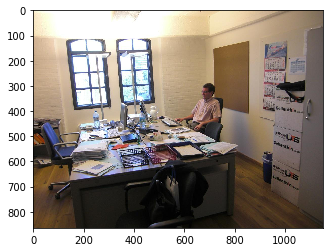

In [14]:
path = os.path.abspath('/home/s4746627/inference_im/thesis.jpg')
im = imread(path)
plt.imshow(im)

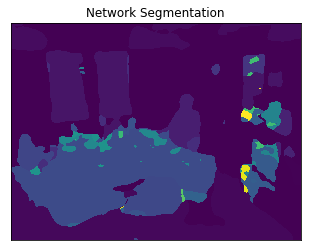

In [15]:
#mug = os.path.abspath('/home/s4746627/inference_im/mug.jpeg')
#im = Image.open(image)
in_ = np.array(im, dtype=np.float32)
in_ = in_[:,:,::-1]
in_ = in_.transpose((2,0,1))

net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_

net.forward()
out = net.blobs['score'].data[0].argmax(axis=0)

plt.imshow(out)
plt.title('Network Segmentation'), plt.xticks([]), plt.yticks([])

plt.imsave('seg_example.png', out)